# Flight Price Prediction

As a part of my flight price prediction project, I am focusing on the route between Delhi and Mumbai. An airline company provides air transport services for passengers and freight using aircraft, and they assign prices to their services to maximize profitability. The pricing of airline tickets is affected by several factors such as flight duration, days left for departure, arrival time, and departure time, among others. To predict the flight prices between Delhi and Mumbai, I will be using Machine Learning (ML) to infer the proprietary rules and algorithms that set the price. Through this project, I aim to build a model that can accurately predict the flight prices between Delhi and Mumbai based on historical data, thereby helping travelers to plan their trip more efficiently and save money.

In [1]:
# Importing Requiered Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

The data set for this project acquired from Kaggle ('Clean_Dataset.csv') Year 2022.

In [2]:
df = pd.read_csv('Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


But for this project, I only wanted to use two different cities so I edited the csv file and created a new edited version which only includes Delhi(source_city) and Mumbai(destination_city) .

In [4]:
# Filter the DataFrame to only include rows with Delhi as source_city and Mumbai as destination_city
df = df[(df['source_city'] == 'Delhi') & (df['destination_city'] == 'Mumbai')]

# Export the filtered DataFrame to a new CSV file
df.to_csv('Clean_Dataset.csv1', index=False)

df = pd.read_csv('Clean_Dataset.csv1')

In [5]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [6]:
#dropping Unnamed: 0 Column
df=df.drop('Unnamed: 0',axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           15289 non-null  object 
 1   flight            15289 non-null  object 
 2   source_city       15289 non-null  object 
 3   departure_time    15289 non-null  object 
 4   stops             15289 non-null  object 
 5   arrival_time      15289 non-null  object 
 6   destination_city  15289 non-null  object 
 7   class             15289 non-null  object 
 8   duration          15289 non-null  float64
 9   days_left         15289 non-null  int64  
 10  price             15289 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.3+ MB


In [8]:
#Statistical insights from the data 
df.describe()

,duration,days_left,price
count,15289.000000,15289.000000,15289.000000
mean,10.367774,25.828373,19355.829812
std,7.518482,13.675568,19777.253580
min,2.000000,1.000000,2281.000000
25%,3.830000,14.000000,4381.000000
50%,8.250000,26.000000,7262.000000
75%,15.170000,38.000000,36712.000000
max,30.080000,49.000000,95657.000000


In [9]:
df.corr()

,duration,days_left,price
duration,1.000000,-0.035305,0.236038
days_left,-0.035305,1.000000,-0.097682
price,0.236038,-0.097682,1.000000


In [10]:
# Size of the data 
df.shape

(15289, 11)

### Total Number of Flights From Delhi to Mumbai

In [11]:
df.groupby(['flight','source_city','destination_city','airline','class'],
as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head()

,source_city,destination_city,flight
0,Delhi,Mumbai,364


### Which Airlane Has the Most Costumers ?

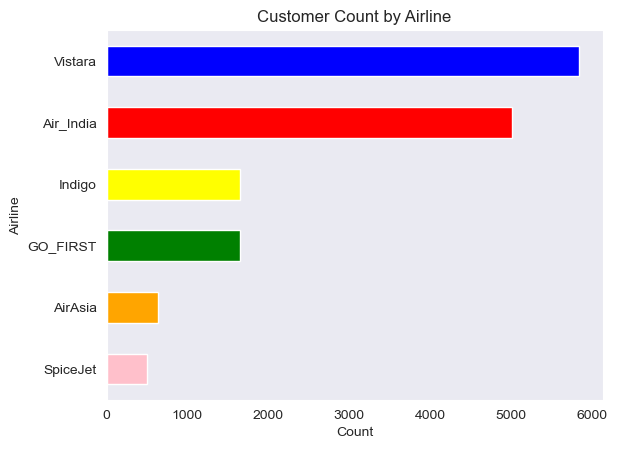

In [12]:
airline_counts = df['airline'].value_counts().sort_values(ascending=True)
sns.set_style("dark")
colors = ['pink', 'orange', 'green', 'yellow', 'red', 'blue']

airline_counts.plot(kind='barh' , color=colors)
plt.title("Customer Count by Airline")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

### Which Airlane Has The Most Flights ? 

In [13]:
mpa = df.groupby(['flight','airline'],as_index=False).count()
mpa.airline.value_counts()

Air_India    73
Indigo       59
GO_FIRST     50
Vistara      46
SpiceJet     18
AirAsia      15
Name: airline, dtype: int64

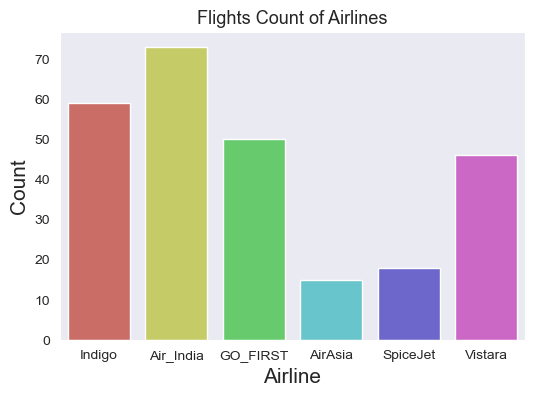

In [14]:
#Visiualize
plt.figure(figsize=(6,4))
sns.countplot(mpa['airline'],palette='hls')
plt.title('Flights Count of Airlines',fontsize=13)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()


Air_India is has the most flights .

### What's More Common Economy or Business ?

In [15]:
eb = df.groupby(['flight','airline','class'],as_index=False).count()
eb['class'].value_counts()

Economy     260
Business    104
Name: class, dtype: int64

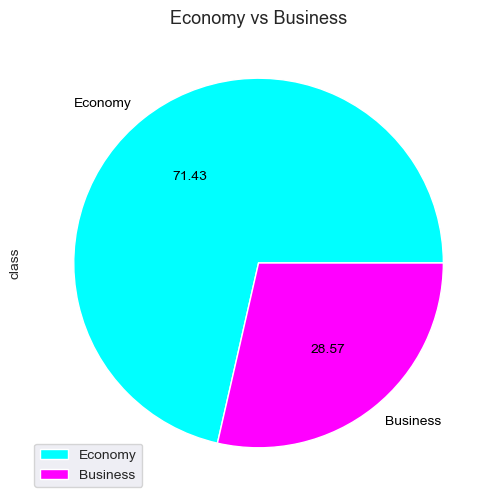

In [16]:
#Visualize
plt.figure(figsize=(8,6))
eb['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Economy vs Business',fontsize=13)
plt.legend(['Economy','Business'])
plt.show()

### Average Price of Different Airlines

In [17]:
df.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(10)

,airline,source_city,destination_city,price
0,AirAsia,Delhi,Mumbai,3981.191456
1,Air_India,Delhi,Mumbai,23695.916916
2,GO_FIRST,Delhi,Mumbai,5762.211515
3,Indigo,Delhi,Mumbai,4473.739130
4,SpiceJet,Delhi,Mumbai,4628.251984
5,Vistara,Delhi,Mumbai,26630.293322


### How Does Ticket Price Varies Between Airlines ?

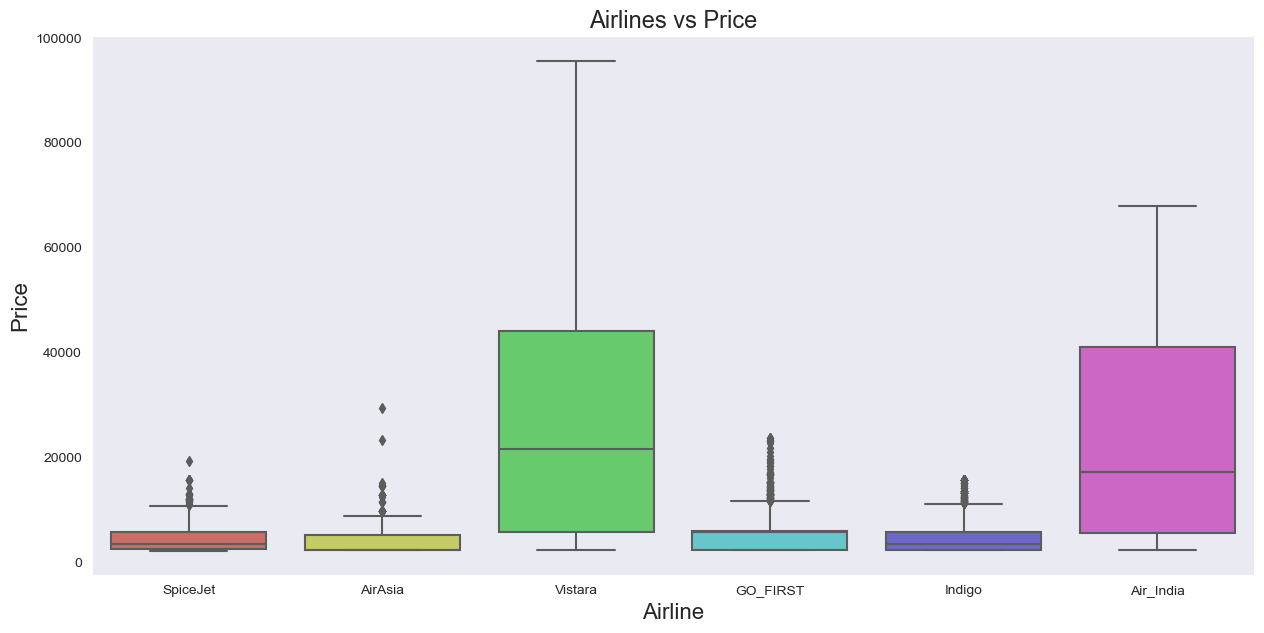

In [18]:
plt.figure(figsize=(15,7))
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines vs Price',fontsize=17)
plt.xlabel('Airline',fontsize=16)
plt.ylabel('Price',fontsize=16)
plt.show()

+ As we can see here Vistara and Air_India has the Maximum price range compared to other Airlines.

### How Does The Ticket Price Vary Between Economy And Business Class?

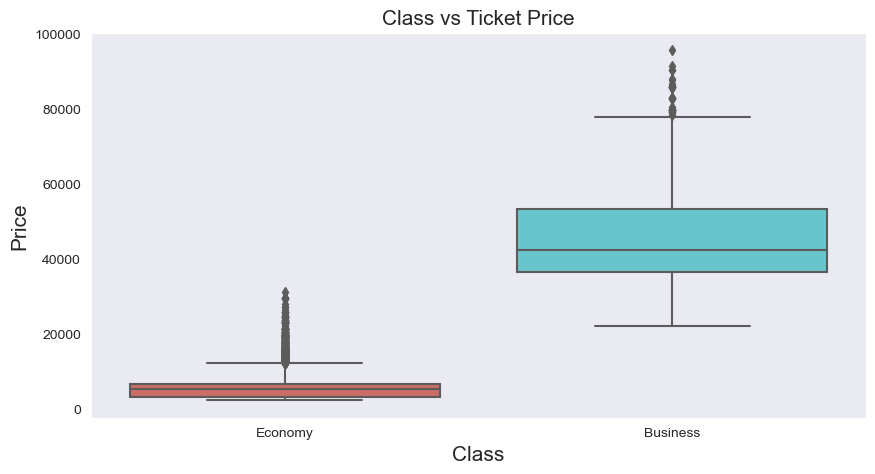

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

+ Businnes class is considerably more expensive than the Economy class

### How the Ticket Price change based on the Departure Time and Arrival Time?


##### Departure Time Vs Ticket Price

The Ticket price is highest on morning and night departures and cheapest on the late night .  

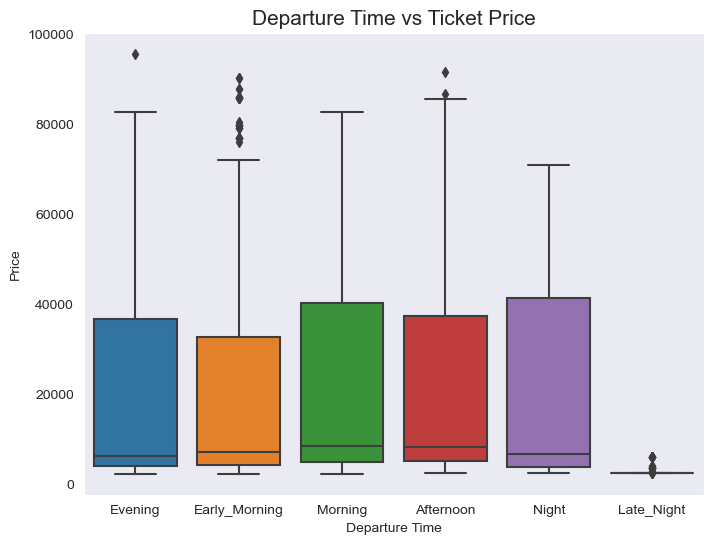

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time vs Ticket Price',fontsize=15)
plt.xlabel('Departure Time',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.show()

#####  Arrival Time Vs Ticket Price

The ticket prices for arrival time has similar pattern only exception in this case is early morning. 
+ In general(except outliers) early morning arrival ticket prices considerably cheaper than early mornig departures.
+ Night time and Morning has the highest ticket prices

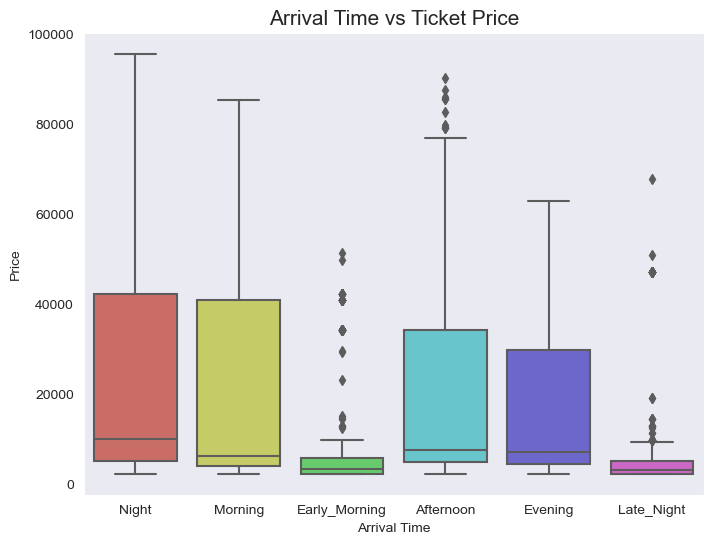

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time vs Ticket Price',fontsize=15)
plt.xlabel('Arrival Time',fontsize=10)
plt.ylabel('Price',fontsize=10)
plt.show()

### When Is The Best Time To Buy Tickets ? 

As we can see on the graph, price range is highest 3-4 days before departure.
+ Buying tickets three weeks prior departure would be the best time to buy. 

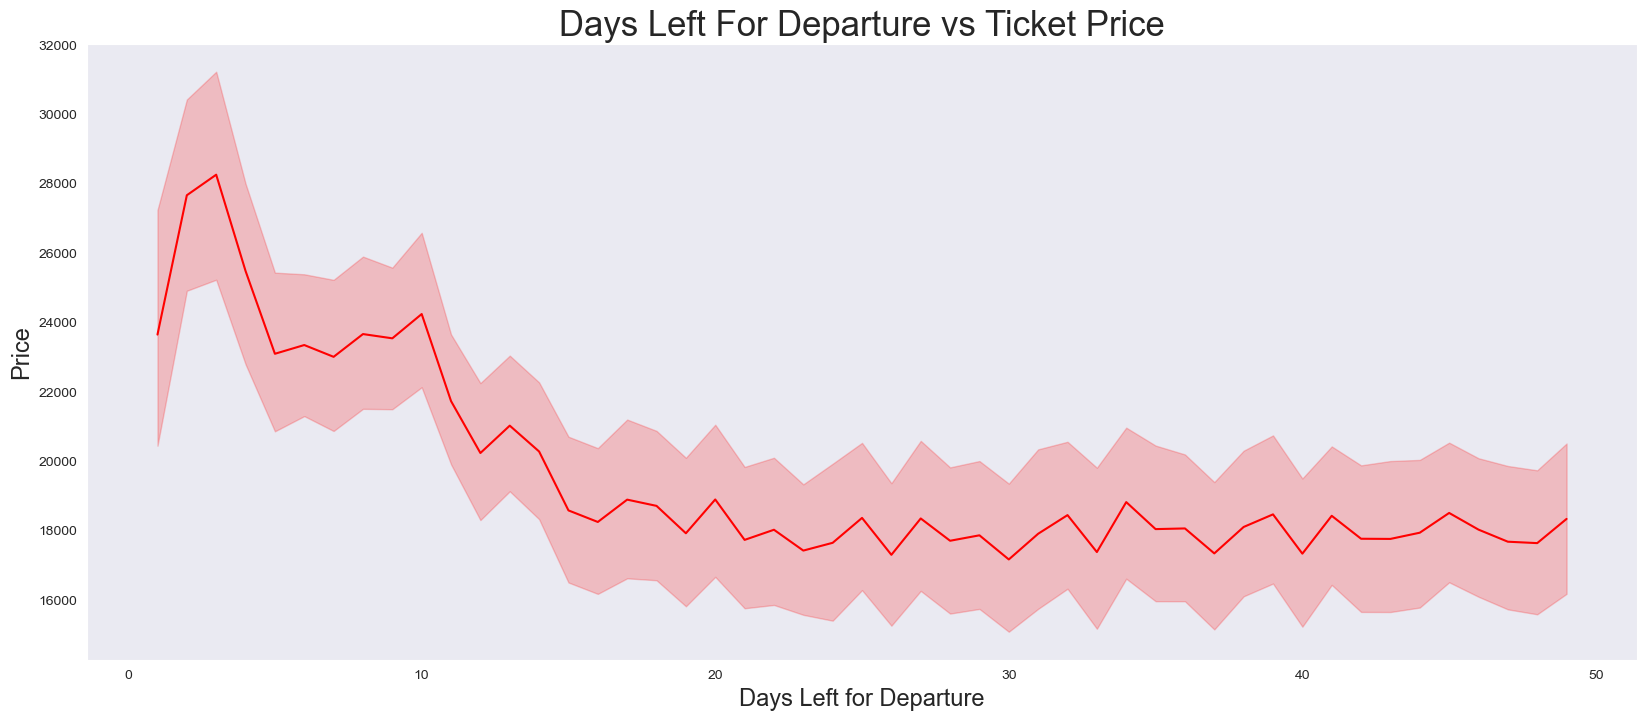

In [22]:
plt.figure(figsize=(20,8))
sns.lineplot(data=df,x='days_left',y='price',color='red')
plt.title('Days Left For Departure vs Ticket Price',fontsize=25)
plt.xlabel('Days Left for Departure',fontsize=17)
plt.ylabel('Price',fontsize=17)
plt.show()

## Training the Model

In [24]:
# First create back up file
df_bk=df.copy()

In [25]:
# Coverting the labels into a numeric form using Label Encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [26]:
# storing the Dependent Variables in X and Independent Variable in Y

x=df.drop(['price'],axis=1)
y=df['price']

In [27]:
# Splitting the Data into Training set and Testing Set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((10702, 10), (4587, 10), (10702,), (4587,))

In [28]:
# Scaling the values to convert the int values to Machine Languages

from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

In [30]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[]
   ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[]
   ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [32]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)


# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelXGR]

for models in MM:
    
    # Fit the model with train data
    
    models.fit(x_train, y_train)
    
    # Predict the model with test data

    y_pred = models.predict(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))
    
    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Evaluation of MAPE 

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')
    
    # Calculate Adjusted R squared values 

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = Results.append(new_row, ignore_index=True)
    #------------------------------------------------------------

Model Name:  LinearRegression()
Mean Absolute Error (MAE): 4765.504
Mean Squared Error (MSE): 42895423.087
Root Mean Squared Error (RMSE): 6549.46
R2_score: 0.889524
Root Mean Squared Log Error (RMSLE): 8.787
Mean Absolute Percentage Error (MAPE): 50.75 %
Adj R Square:  0.889452
------------------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeRegressor()
Mean Absolute Error (MAE): 897.98
Mean Squared Error (MSE): 8860082.239
Root Mean Squared Error (RMSE): 2976.589
R2_score: 0.977181
Root Mean Squared Log Error (RMSLE): 7.999
Mean Absolute Percentage Error (MAPE): 6.45 %
Adj R Square:  0.977166
------------------------------------------------------------------------------------------------------------
Model Name:  RandomForestRegressor()
Mean Absolute Error (MAE): 873.663
Mean Squared Error (MSE): 5424188.011
Root Mean Squared Error (RMSE): 2328.989
R2_score: 0.98603
Root Mean Squared Log Error (RMSLE): 7.753
Mean Abs

In [33]:
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,LinearRegression(),4765.503780,0.889452,6549.459755,50.747427,4.289542e+07,8.787138,0.889524
1,DecisionTreeRegressor(),897.980379,0.977166,2976.589028,6.452047,8.860082e+06,7.998533,0.977181
2,"(DecisionTreeRegressor(max_features='auto', ra...",873.662658,0.986021,2328.988624,6.506478,5.424188e+06,7.753189,0.986030
3,KNeighborsRegressor(),1756.439895,0.967459,3553.408241,11.181263,1.262671e+07,8.175662,0.967480
4,"XGBRegressor(base_score=None, booster=None, ca...",1063.245324,0.987541,2198.705696,9.157234,4.834307e+06,7.695624,0.987549


In [35]:
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor', 'KNeighborsRegressor','XGBRegressor',]
result=pd.DataFrame({'Model_Name':models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percentage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']
result=result.sort_values(by='Adj_R_Square',ascending=False).reset_index(drop=True)
result

,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,XGBRegressor,0.987541,1063.245324,2198.705696,9.157234,4.834307e+06,7.695624,0.987549
1,RandomForestRegressor,0.986021,873.662658,2328.988624,6.506478,5.424188e+06,7.753189,0.986030
2,DecisionTreeRegressor,0.977166,897.980379,2976.589028,6.452047,8.860082e+06,7.998533,0.977181
3,KNeighborsRegressor,0.967459,1756.439895,3553.408241,11.181263,1.262671e+07,8.175662,0.967480
4,LinearRegression,0.889452,4765.503780,6549.459755,50.747427,4.289542e+07,8.787138,0.889524


+ As seen from the results above , XGBRegressor gives the best error values.

##### Training the data with XGBRegressor

In [36]:
#Trainig the model with XGBRegressor

modelXGR.fit(x_train, y_train)

# Predict the model with test data

y_pred = modelXGR.predict(x_test)


In [37]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=df_bk.merge(out,left_index=True,right_index=True)

In [40]:
result.sample(15)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
14308,Vistara,UK-981,Delhi,Night,zero,Night,Mumbai,Business,2.17,41,34472,34472,37400.785156
6505,Air_India,AI-481,Delhi,Morning,one,Morning,Mumbai,Economy,25.08,33,4161,4161,4070.245117
14339,Air_India,AI-837,Delhi,Evening,one,Morning,Mumbai,Business,15.33,41,41113,41113,42617.398438
7492,Air_India,AI-887,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.08,38,2476,2476,2635.001465
811,Vistara,UK-637,Delhi,Evening,one,Morning,Mumbai,Economy,18.33,6,9000,9000,9009.797852
14855,Vistara,UK-953,Delhi,Night,zero,Night,Mumbai,Business,2.17,46,22152,22152,22075.808594
11594,Vistara,UK-707,Delhi,Evening,one,Night,Mumbai,Business,6.00,16,60713,60713,62593.777344
3910,Vistara,UK-835,Delhi,Evening,one,Morning,Mumbai,Economy,15.75,21,5040,5040,5390.464355
9723,Air_India,AI-411,Delhi,Early_Morning,one,Afternoon,Mumbai,Economy,6.33,48,5231,5231,4622.635742
12402,Vistara,UK-933,Delhi,Afternoon,zero,Evening,Mumbai,Business,2.17,24,34472,34472,34542.558594


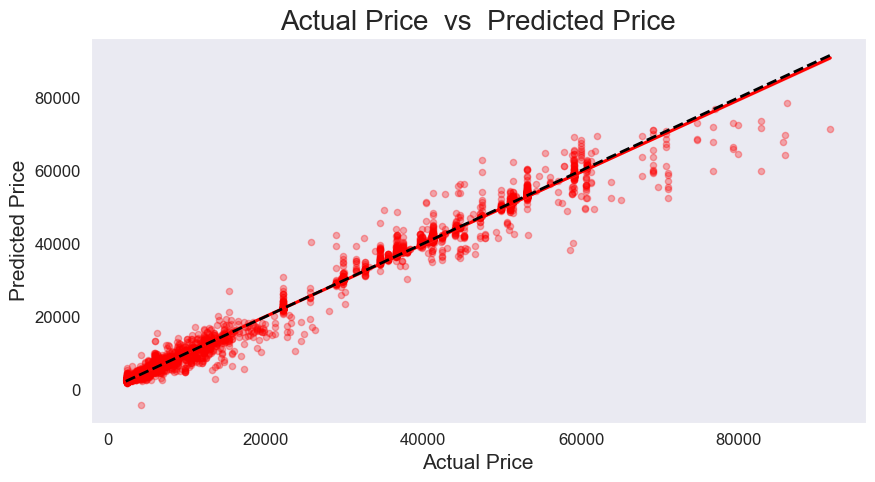

In [43]:
plt.figure(figsize=(10,5))
sns.regplot(x='Price_actual',y='Price_pred',data=result, color='red', scatter_kws={'alpha':0.3, 's':20})
plt.plot([result['Price_actual'].min(), result['Price_actual'].max()], [result['Price_actual'].min(), result['Price_actual'].max()], 'k--', lw=2)
plt.title('Actual Price  vs  Predicted Price', fontsize=20)
plt.xlabel('Actual Price', fontsize=15)
plt.ylabel('Predicted Price', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
